# Перечень используемых библиотек для сбора данных


In [1]:
import pandas as pd
from urllib.parse import urlparse, urlencode
import os
import numpy as np
import pycountry
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry_convert as pc
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score, roc_auc_score
from mlxtend.classifier import StackingClassifier
from sklearn.neural_network import MLPClassifier
import xgboost
import catboost

In [7]:
ben = pd.read_csv('../benignDataset.csv')

In [8]:
ben.head(10)

,http://1337x.to/torrent/1048648/American-Sniper-2014-MD-iTALiAN-DVDSCR-X264-BST-MT/
0,http://1337x.to/torrent/1110018/Blackhat-2015-...
1,http://1337x.to/torrent/1122940/Blackhat-2015-...
2,http://1337x.to/torrent/1124395/Fast-and-Furio...
3,http://1337x.to/torrent/1145504/Avengers-Age-o...
4,http://1337x.to/torrent/1160078/Avengers-age-o...
5,http://1337x.to/torrent/294349/American-Idol-S...
6,http://189.cn/dqmh/userCenter/myOrderInfoList....
7,http://2gis.ru/moscow/search/%D0%9F%D0%BE%D0%B...
8,http://abc.go.com/shows/general-hospital/episo...
9,http://abc.go.com/shows/the-muppets/video/new-...


# Объединение файлов, полученных при обработке URL

In [4]:
phPart1 = pd.read_csv('../ResultPhish_part1.csv')
phPart2 = pd.read_csv('../ResultPhish_part2.csv')
phPart3 = pd.read_csv('../ResultPhish_part3.csv')

resultPh = pd.concat([phPart1, phPart2, phPart3])
resultPh.to_csv('ResultPhishParams.csv', index=False)

phBen1 = pd.read_csv('../ResultBenign_part1.csv')
phBen2 = pd.read_csv('../ResultBenign_part2.csv')
phBen3 = pd.read_csv('../ResultBenign_part3.csv')
phBen4 = pd.read_csv('../ResultBenign_part4.csv')
phBen5 = pd.read_csv('../ResultBenign_part5.csv')
phBen6 = pd.read_csv('../ResultBenign_part6.csv')

resultBen = pd.concat([phBen1, phBen2, phBen3, phBen4, phBen5, phBen6])
resultBen.to_csv('ResultBenignParams.csv', index=False)

# Пример данных, полученных при первичной обработке URL

In [2]:
phishData = pd.read_csv(os.path.abspath("../ResultPhishParams.csv"))
pd.set_option('display.max_columns', None)
print(phishData.head())

                                                 url  urlLen  domainLen   
0                    https://aggiornamento-invio.com      31         23  \
1  https://www.ups-delivery-express.com/verificat...      61         28   
2      https://www.dlrect3.smbcc.co.jp.fondtune.com/      45         36   
3  https://ipfs.io/ipfs/bafybeieyyzdq2yahew3zafst...     102          7   
4  http://www.kueronekayaeotn.co.jp.kuerocekayaao...      60         52   

   subDomainCount  dashInDomain  IPinDomain                  domainAge   
0               0             0           0                          0  \
1               1             1           0    90 days 20:03:50.414137   
2               5             0           0   609 days 07:11:21.381587   
3               0             0           0  3262 days 19:02:04.467975   
4               5             0           0   404 days 04:01:09.297924   

         country  fromWHOIS  HTTPS   
0            NaN          0      1  \
1         Canada          1 

In [11]:
benignData = pd.read_csv(os.path.abspath("../ResultBenignParams.csv"))
pd.set_option('display.max_columns', None)
print(benignData.head())

                                                 url  urlLen  domainLen   
0  http://atwiki.jp/wiki/%E5%89%8D%E7%94%B0%E5%A4...     124          9  \
1  http://uproxx.com/sports/2015/04/hbo-and-showt...     112         10   
2  http://thenextweb.com/gadgets/2015/05/10/canar...     108         14   
3  http://extratorrent.cc/torrent/4191090/Ballet....      85         15   
4  http://thenextweb.com/insider/2014/10/07/squar...     148         14   

   subDomainCount  dashInDomain  IPinDomain                  domainAge   
0               0             0           0                          0  \
1               0             0           0  6015 days 18:44:58.371718   
2               0             0           0  5375 days 22:41:58.637857   
3               0             0           0  4523 days 05:39:53.978325   
4               0             0           0  5375 days 22:42:05.069162   

         country  fromWHOIS  HTTPS                               ISP   
0        Ireland          1     

In [43]:
print("Типы данных:\n", phishData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   url             10000 non-null  object
 1   urlLen          10000 non-null  int64 
 2   domainLen       10000 non-null  int64 
 3   subDomainCount  10000 non-null  int64 
 4   dashInDomain    10000 non-null  int64 
 5   IPinDomain      10000 non-null  int64 
 6   domainAge       10000 non-null  object
 7   country         8738 non-null   object
 8   fromWHOIS       10000 non-null  int64 
 9   HTTPS           10000 non-null  int64 
 10  ISP             8701 non-null   object
 11  ORG             7955 non-null   object
dtypes: int64(7), object(5)
memory usage: 937.6+ KB
Типы данных:
 None


In [9]:
print("Типы данных:\n", benignData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10135 entries, 0 to 10134
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   url             10135 non-null  object
 1   urlLen          10135 non-null  int64 
 2   domainLen       10135 non-null  int64 
 3   subDomainCount  10135 non-null  int64 
 4   dashInDomain    10135 non-null  int64 
 5   IPinDomain      10135 non-null  int64 
 6   domainAge       10135 non-null  object
 7   country         9668 non-null   object
 8   fromWHOIS       10135 non-null  int64 
 9   HTTPS           10135 non-null  int64 
 10  ISP             9481 non-null   object
 11  ORG             9244 non-null   object
dtypes: int64(7), object(5)
memory usage: 950.3+ KB
Типы данных:
 None


In [26]:
print("Количество NaN:\n", phishData.isnull().sum())

Количество NaN:
 url                  0
urlLen               0
domainLen            0
subDomainCount       0
dashInDomain         0
IPinDomain           0
domainAge            0
country           1262
fromWHOIS            0
HTTPS                0
ISP               1299
ORG               2045
dtype: int64


In [32]:
print("Количество NaN:\n", benignData.isnull().sum())

Количество NaN:
 url                 0
urlLen              0
domainLen           0
subDomainCount      0
dashInDomain        0
IPinDomain          0
domainAge           0
country           467
fromWHOIS           0
HTTPS               0
ISP               654
ORG               891
dtype: int64


# Модификация колонки 'country'
Изменение поля country таким образом, чтобы вместо полного названия был буквенный код. Это необходимо, так как в списке встречаются такие названия, как Russia и Russian Federation, что будет являться для нейронной сети разными значениями. Поэтому заменим их на RU.

In [6]:
for i in range(phishData.shape[0]):
    country = phishData['country'].loc[phishData.index[i]]
    if pd.notna(country):
        try:
            countryObj = pycountry.countries.search_fuzzy(country)[0]
            countryCode = countryObj.alpha_2
            print(f"The alpha-2 code for {country} is {countryCode}")
            phishData.at[phishData.index[i], 'country'] = countryCode
        except LookupError:
            print(f"No alpha-2 code found for {country}")
    else:
        print(country)

print(phishData.head())
phishData.to_csv('ResultPhishParamsModifyCountry.csv', index=False)


nan
The alpha-2 code for Canada is CA
The alpha-2 code for Japan is JP
The alpha-2 code for United States is US
The alpha-2 code for China is CN
The alpha-2 code for United States is US
nan
The alpha-2 code for Hong Kong is HK
The alpha-2 code for Australia is AU
The alpha-2 code for Canada is CA
The alpha-2 code for United Kingdom is GB
nan
The alpha-2 code for Germany is DE
The alpha-2 code for Poland is PL
The alpha-2 code for United States is US
nan
nan
The alpha-2 code for France is FR
The alpha-2 code for Brazil is BR
The alpha-2 code for United States is US
The alpha-2 code for Canada is CA
The alpha-2 code for Poland is PL
The alpha-2 code for China is CN
The alpha-2 code for United States is US
The alpha-2 code for United States is US
The alpha-2 code for Brazil is BR
The alpha-2 code for United States is US
The alpha-2 code for China is CN
The alpha-2 code for Canada is CA
The alpha-2 code for China is CN
The alpha-2 code for United States is US
The alpha-2 code for United St

In [7]:
for i in range(benignData.shape[0]):
    country = benignData['country'].loc[benignData.index[i]]
    if pd.notna(country):
        try:
            countryObj = pycountry.countries.search_fuzzy(country)[0]
            countryCode = countryObj.alpha_2
            benignData.at[benignData.index[i], 'country'] = countryCode
        except LookupError:
            print(f"No alpha-2 code found for {country}")
    else:
        print(country)

print(benignData.head())
benignData.to_csv('ResultBenignParamsModifyCountry.csv', index=False)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


Запишем новые данные, полученные после обработки названия стран

In [8]:
phishData = pd.read_csv(os.path.abspath("../ResultPhishParamsModifyCountry.csv"))
print(phishData.head())

                                                 url  urlLen  domainLen   
0                    https://aggiornamento-invio.com      31         23  \
1  https://www.ups-delivery-express.com/verificat...      61         28   
2      https://www.dlrect3.smbcc.co.jp.fondtune.com/      45         36   
3  https://ipfs.io/ipfs/bafybeieyyzdq2yahew3zafst...     102          7   
4  http://www.kueronekayaeotn.co.jp.kuerocekayaao...      60         52   

   subDomainCount  dashInDomain  IPinDomain                  domainAge   
0               0             0           0                          0  \
1               1             1           0    90 days 20:03:50.414137   
2               5             0           0   609 days 07:11:21.381587   
3               0             0           0  3262 days 19:02:04.467975   
4               5             0           0   404 days 04:01:09.297924   

  country  fromWHOIS  HTTPS   
0     NaN          0      1  \
1      CA          1      1   
2      JP  

In [58]:
benignData = pd.read_csv(os.path.abspath("../ResultBenignParamsModifyCountry.csv"))
print(benignData.head())

                                                 url  urlLen  domainLen   
0  http://atwiki.jp/wiki/%E5%89%8D%E7%94%B0%E5%A4...     124          9  \
1  http://uproxx.com/sports/2015/04/hbo-and-showt...     112         10   
2  http://thenextweb.com/gadgets/2015/05/10/canar...     108         14   
3  http://extratorrent.cc/torrent/4191090/Ballet....      85         15   
4  http://thenextweb.com/insider/2014/10/07/squar...     148         14   

   subDomainCount  dashInDomain  IPinDomain                  domainAge   
0               0             0           0                          0  \
1               0             0           0  6015 days 18:44:58.371718   
2               0             0           0  5375 days 22:41:58.637857   
3               0             0           0  4523 days 05:39:53.978325   
4               0             0           0  5375 days 22:42:05.069162   

  country  fromWHOIS  HTTPS                               ISP   
0      IE          1      0          Am

Ниже были найдены фишинговые URL, у которых в качестве страны стоит список, т.е. на домен зарегистрировано 2 страны. И те, у которых страна скрыта. Так как таких адресов немного, от них можно избавиться.

In [89]:
for i in range(phishData.shape[0]):
    if (pd.notna(phishData['country'][i]) == True and len(phishData['country'][i]) != 2):
        print(f"URL - country: {phishData['url'][i]} - {phishData['country'][i]}")

URL - country: http://akmemeats.com - REDACTED FOR PRIVACY
URL - country: https://buzhosting.com/globe/redirect.php - REDACTED FOR PRIVACY
URL - country: http://atomickvvallet.com - Personal data, can not be publicly disclosed according to applicable laws.
URL - country: https://jiofibertv.com/ - REDACTED FOR PRIVACY
URL - country: https://es-correos.triacksitem.com/ - TW,CN
URL - country: https://trustwallect.com/ - HK,CN
URL - country: https://trustwallect.com/index/tw/index.html - HK,CN
URL - country: http://moodysplus.com - HK,CN
URL - country: https://binannice.com/ - HK,CN
URL - country: https://binannice.com/index/binance/index.html - HK,CN


Ниже были найдены фишинговые URL, для которых не удалось найти информацию о стране

In [90]:
count = 0
for i in range(phishData.shape[0]):
    if pd.notna(phishData['country'][i]) == False:
        print(f"URL - country: {phishData['url'][i]} - {phishData['country'][i]}")
        count += 1
print(f"Count NaN: {count}")

URL - country: https://aggiornamento-invio.com - nan
URL - country: https://uuty.ru/profiles/76561197960289903 - nan
URL - country: https://Mirche.oliwcia.life/baner/email@example.com - nan
URL - country: http://ssl0.emilat.pl/alle/vera@rallywitkowscy.pl - nan
URL - country: http://www.bgnjw.com/jp - nan
URL - country: http://78154.duckdns.org/ - nan
URL - country: http://ccvxggpmin.duckdns.org/ - nan
URL - country: http://k3p0mhruoi.sosinadrian.pl/zbyszekcoto/janhalb@post.pl - nan
URL - country: http://mntuninbe.com/# - nan
URL - country: https://registredesolicitudmarzope1.com - nan
URL - country: http://w.affixenappendw.net - nan
URL - country: https://uni-cash.in.net/ - nan
URL - country: https://pushtan-online.help/sp/ - nan
URL - country: https://aavepool.pw/# - nan
URL - country: https://sparkasse-abfrage.click/personendaten-aktualisieren - nan
URL - country: https://lrurwdhjck.duckdns.org/ - nan
URL - country: http://cz83430.tw1.ru/NetfIix-FR/account/sms2.htm - nan
URL - countr

Было сделано два варианта файлов: без стран NaN и со странами NaN

In [10]:
masDrop = []
for i in range(phishData.shape[0]):
    if (pd.notna(phishData['country'][i]) == True and len(phishData['country'][i]) != 2):
        masDrop.append(i)
newPhishData = phishData.drop(masDrop)
newPhishData.to_csv('ResultPhishDeleteAllStrangeCountry.csv', index=False)

In [11]:
phishData = newPhishData

In [103]:
masDrop.clear()
for i in range(phishData.shape[0]):
    if (pd.notna(phishData['country'][i]) == True and len(phishData['country'][i]) != 2) or pd.notna(
            phishData['country'][i]) == False:
        masDrop.append(i)
newPhishDataDelNaN = phishData.drop(masDrop)
newPhishDataDelNaN.to_csv('ResultPhishDeleteAllNaNCountry.csv', index=False)

In [12]:
print(phishData.head())

                                                 url  urlLen  domainLen   
0                    https://aggiornamento-invio.com      31         23  \
1  https://www.ups-delivery-express.com/verificat...      61         28   
2      https://www.dlrect3.smbcc.co.jp.fondtune.com/      45         36   
3  https://ipfs.io/ipfs/bafybeieyyzdq2yahew3zafst...     102          7   
4  http://www.kueronekayaeotn.co.jp.kuerocekayaao...      60         52   

   subDomainCount  dashInDomain  IPinDomain                  domainAge   
0               0             0           0                          0  \
1               1             1           0    90 days 20:03:50.414137   
2               5             0           0   609 days 07:11:21.381587   
3               0             0           0  3262 days 19:02:04.467975   
4               5             0           0   404 days 04:01:09.297924   

  country  fromWHOIS  HTTPS   
0     NaN          0      1  \
1      CA          1      1   
2      JP  

In [ ]:
phishData = newPhishDataDelNaN

In [59]:
for i in range(benignData.shape[0]):
    if (pd.notna(benignData['country'][i]) == True and len(benignData['country'][i]) != 2):
        print(f"URL - country: {benignData['url'][i]} - {benignData['country'][i]}")

In [60]:
count = 0
for i in range(benignData.shape[0]):
    if pd.notna(benignData['country'][i]) == False:
        print(f"URL - country: {benignData['url'][i]} - {benignData['country'][i]}")
        count += 1
print(f"Count NaN: {count}")

URL - country: http://motthegioi.vn/the-gioi-cuoi/clip-bo-gap-con-lam-gai-goi-o-bar-va-cai-ket-bat-ngo-186585.html - nan
URL - country: http://motthegioi.vn/me-con/5-nguyen-nhan-khien-con-dau-de-nghiem-trong-hon-187044.html - nan
URL - country: http://motthegioi.vn/cau-vong-luc-sac/the-normal-heart-trai-tim-gian-don-187082.html - nan
URL - country: http://motthegioi.vn/kieu-bao/co-tich-michelle-phan-tu-khon-kho-thanh-nguoi-hot-nhat-youtube-181603.html - nan
URL - country: http://motthegioi.vn/media/kham-pha-hang-son-doong-qua-phim-tai-lieu-cua-national-geographic-188508.html - nan
URL - country: http://motthegioi.vn/toc-do/trinh-duc-tam-thang-chang-vong-quanh-ho-xuan-huong-182380.html - nan
URL - country: http://motthegioi.vn/moi-truong/mo-cua-bai-rac-phuoc-hiep-neu-khong-con-o-nhiem-153776.html - nan
URL - country: http://motthegioi.vn/khoa-hoc-giao-duc/ngan-ngam-chuyen-thac-si-no-dau-vao-188212.html - nan
URL - country: http://bigcinema.tv/movie/10-dney-v-sumasshedshem-dome---10-days

Аналогичные действия проделываем с валидными адресами

In [13]:
masDrop.clear()
for i in range(benignData.shape[0]):
    if (pd.notna(benignData['country'][i]) == True and len(benignData['country'][i]) != 2):
        masDrop.append(i)
newBenignData = benignData.drop(masDrop)
newBenignData.to_csv('ResultBenignDeleteAllStrangeCountry.csv', index=False)

In [14]:
benignData = newBenignData

In [108]:
masDrop.clear()
for i in range(benignData.shape[0]):
    if (pd.notna(benignData['country'][i]) == True and len(benignData['country'][i]) != 2) or pd.notna(
            benignData['country'][i]) == False:
        masDrop.append(i)
newBenignDataDelNaN = benignData.drop(masDrop)
newBenignDataDelNaN.to_csv('ResultBenignDeleteAllNaNCountry.csv', index=False)

In [ ]:
benignData = newBenignDataDelNaN

Изменим тип поля domainAge, чтобы там хранилось только количество дней в формате int

In [15]:
phishData['domainAge'] = pd.to_timedelta(phishData['domainAge'], errors='coerce')
phishData['domainAge'] = phishData['domainAge'].dt.days.astype(int)

In [16]:
benignData['domainAge'] = pd.to_timedelta(benignData['domainAge'], errors='coerce')
benignData['domainAge'] = benignData['domainAge'].dt.days.astype(int)

Так как количество стран довольно велико, сделаем распределение стран по частям света, чтобы моделям было проще классифицировать данные. Для этого можно воспользоваться библиотекой pycountry_convert, которая по коду страны определяет, к какой части света она относится.

In [17]:
def addContinent(countryCode):
    try:
        continent_code = pc.country_alpha2_to_continent_code(countryCode)
        return continent_code
    except:
        return 'NaN'

In [18]:
phishData['sideOfTheWorld'] = phishData['country'].apply(addContinent)

In [19]:
benignData['sideOfTheWorld'] = benignData['country'].apply(addContinent)

In [20]:
print(benignData.head(10))

                                                 url  urlLen  domainLen   
0  http://atwiki.jp/wiki/%E5%89%8D%E7%94%B0%E5%A4...     124          9  \
1  http://uproxx.com/sports/2015/04/hbo-and-showt...     112         10   
2  http://thenextweb.com/gadgets/2015/05/10/canar...     108         14   
3  http://extratorrent.cc/torrent/4191090/Ballet....      85         15   
4  http://thenextweb.com/insider/2014/10/07/squar...     148         14   
5  http://torrentdn.com/bbs/s.php?bo_table=torren...     136         13   
6  http://xvideo-jp.com/sex%E5%8B%95%E7%94%BB%E3%...     113         13   
7  https://privatbank.ua/ua/business/universalnyj...      89         13   
8  https://www.gov.uk/government/policies/radioac...      83         10   
9  http://torcache.net/torrent/74A6623660023D11FC...     134         12   

   subDomainCount  dashInDomain  IPinDomain  domainAge country  fromWHOIS   
0               0             0           0          0      IE          1  \
1               0   

# Распределение классов
Для начала объединим два dataFrame в один и добавим параметр 'type', который если равен 1, означает, что перед нами фишинговый URL, а если 0 - легитимный.
Далее необходимо проанализировать, как происходит распределение данных по классам с учетом параметра 'type'. Для этого были построены гистограммы с использованием функции catplot.
Для данных числовых, таких как domainAge, urlLen, domainLen были построены классические гистограммы с наложением друг на друга значений параметров для фишинговых URL и для легитимных. Таким образом можно легко заметить различия в распределении значений.

In [21]:
phishData['type'] = 1

In [22]:
benignData['type'] = 0

In [23]:
allDataset = pd.concat([phishData, benignData], axis=0, ignore_index=True)
print(allDataset.sample(10))

                                                     url  urlLen  domainLen   
2751   https://dhl.3512112.rsg365.co.uk/verfolgung/22...      51         24  \
15686  http://ink361.com/app/users/ig-260375673/fcbar...      91         10   
15182  http://twitter.com/home?status=%E3%83%8C%E3%81...     361         11   
17802  http://yourlust.com/videos/sweet-looking-brune...     110         12   
2971          http://verify-center2.strangled.net/verify      42         28   
12162  http://xhamster.com/movies/4570137/chubby_and_...      90         12   
11606  http://thenextweb.com/media/2014/10/16/rdios-e...     124         14   
5883   http://three.damstonges.com/pages/plcoinmk/ind...      52         20   
5767    https://mynembercard.point.soumu.jo.diujiang.cn/      48         39   
13063  http://onedio.com/haber/496-olum-yildonumu-nde...      97         10   

       subDomainCount  dashInDomain  IPinDomain  domainAge country  fromWHOIS   
2751                3             0           0  

In [2]:
allDataset.to_csv('TrainDataset.csv', index=False)
print(allDataset.head())

NameError: name 'allDataset' is not defined

In [3]:
allDataset = pd.read_csv('TrainDataset.csv', na_filter=False)
print(allDataset.head(6))

                                                 url  urlLen  domainLen   
0                    https://aggiornamento-invio.com      31         23  \
1  https://www.ups-delivery-express.com/verificat...      61         28   
2      https://www.dlrect3.smbcc.co.jp.fondtune.com/      45         36   
3  https://ipfs.io/ipfs/bafybeieyyzdq2yahew3zafst...     102          7   
4  http://www.kueronekayaeotn.co.jp.kuerocekayaao...      60         52   
5              https://websecureoutlook.glitch.me/js      37         26   

   subDomainCount  dashInDomain  IPinDomain  domainAge country  fromWHOIS   
0               0             0           0          0                  0  \
1               1             1           0         90      CA          1   
2               5             0           0        609      JP          1   
3               0             0           0       3262      US          1   
4               5             0           0        404      CN          1   
5           

In [4]:
print(allDataset.head(6))

                                                 url  urlLen  domainLen   
0                    https://aggiornamento-invio.com      31         23  \
1  https://www.ups-delivery-express.com/verificat...      61         28   
2      https://www.dlrect3.smbcc.co.jp.fondtune.com/      45         36   
3  https://ipfs.io/ipfs/bafybeieyyzdq2yahew3zafst...     102          7   
4  http://www.kueronekayaeotn.co.jp.kuerocekayaao...      60         52   
5              https://websecureoutlook.glitch.me/js      37         26   

   subDomainCount  dashInDomain  IPinDomain  domainAge country  fromWHOIS   
0               0             0           0          0                  0  \
1               1             1           0         90      CA          1   
2               5             0           0        609      JP          1   
3               0             0           0       3262      US          1   
4               5             0           0        404      CN          1   
5           

In [46]:
def dataAnalysis_DistributionClasses(df):
    for column in ['IPinDomain', 'HTTPS', 'dashInDomain', 'fromWHOIS', 'sideOfTheWorld']:
        print(df[column].describe())
        g = sns.catplot(data=df, x=column, y='type', kind="bar", aspect=1.5, ci=None).set(title='Distribution of classes')
        g.set_xlabels(fontsize=14)
        g.set_ylabels(fontsize=14)
        g.set(xlabel='HTTPS', ylabel='Тип')


In [21]:
def dataAnalysis_CountableParams(df):
    for column in ['urlLen', 'domainLen', 'subDomainCount', 'domainAge']:
        print(df[column].describe())
        plt.hist(x=df[df['type'] == 1][column], label='Фишинговый', color='grey', bins=20, alpha=0.7)
        plt.hist(x=df[df['type'] == 0][column], label='Безопасный', color='magenta', bins=20,
                 edgecolor='magenta', alpha=0.3)
        plt.legend(fontsize=14)
        plt.xlabel('Длина URL',fontsize=14)
        plt.ylabel('Количество URL',fontsize=14)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()


Ниже представлена карта корреляции параметров. Так как у нас имеются категориальные параметры (названия стран и частей света), то использовать их напрямую для машинного обучения нельзя. Необходимо производить кодирование. Для этого можно использовать одну из технологий: One-Hot Encoding или Label Encoding.
- Label Encoding закодирует каждое уникальное значение категориального признака целым числом в диапазоне от 0 до n-1, где n - количество уникальных значений категориального признака. Это преобразование удобно использовать, если значения признака могут быть упорядочены (например, "холодный", "теплый", "горячий"), и в этом случае эти числа будут представлять порядок значений. Однако, если значения признака не упорядочены, то Label Encoding может привести к неправильной интерпретации значений моделью машинного обучения.
- One-Hot Encoding кодирует каждое уникальное значение категориального признака в отдельный бинарный признак (флаг) со значением 0 или 1. One-Hot Encoding часто используется для категориальных признаков без порядка, или в тех случаях, когда порядок не имеет значения, и нужно просто создать отдельный бинарный признак для каждого уникального значения.

One-Hot Encoding является более безопасным выбором, когда дело доходит до кодирования категориальных признаков, так как он избегает неправильной интерпретации значений моделью машинного обучения. Однако, он может увеличить размерность данных и усложнить модель машинного обучения. Label Encoding может быть более простым выбором в случае упорядоченных значений признаков, и может помочь уменьшить размерность данных.
В нашем случае параметры "country" и "sideOfTheWorld" не являются упорядоченными, а значит вариант с использованием Label Encoding не подходит. Так как One-Hot Encoding для каждого нового значения параметров "country" и "sideOfTheWorld" строит новый параметр. Если при построении карты корреляции использовать категориальные параметры, закодированные с помощью One-Hot Encoding, то матрица получится огромных размеров и не будет читабельной. Поэтому карта корреляций строится только по численным признакам.

In [48]:
def correlationMap(df):
    #encoder = OneHotEncoder()
    #side_of_the_world = encoder.fit_transform(df['sideOfTheWorld'].values.reshape(-1, 1)).toarray()
    #country = encoder.fit_transform(df['country'].values.reshape(-1, 1)).toarray()
    #encoded_df = pd.concat([pd.DataFrame(side_of_the_world), pd.DataFrame(country)], axis=1)
    #corr_matrix = encoded_df.corr()

    #plt.figure(figsize=(12,10), dpi= 80)
    #sns.heatmap(corr_matrix, annot=True, fmt=".3f")

    plt.figure(figsize=(12, 10), dpi=80)
    sns.heatmap(df.corr(), annot=True, fmt=".3f")

    plt.title('Матрица корреляции', fontsize=22)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(fontsize=14)
    plt.ylabel(fontsize=14)

    plt.show()

TypeError: xlabel() missing 1 required positional argument: 'xlabel'

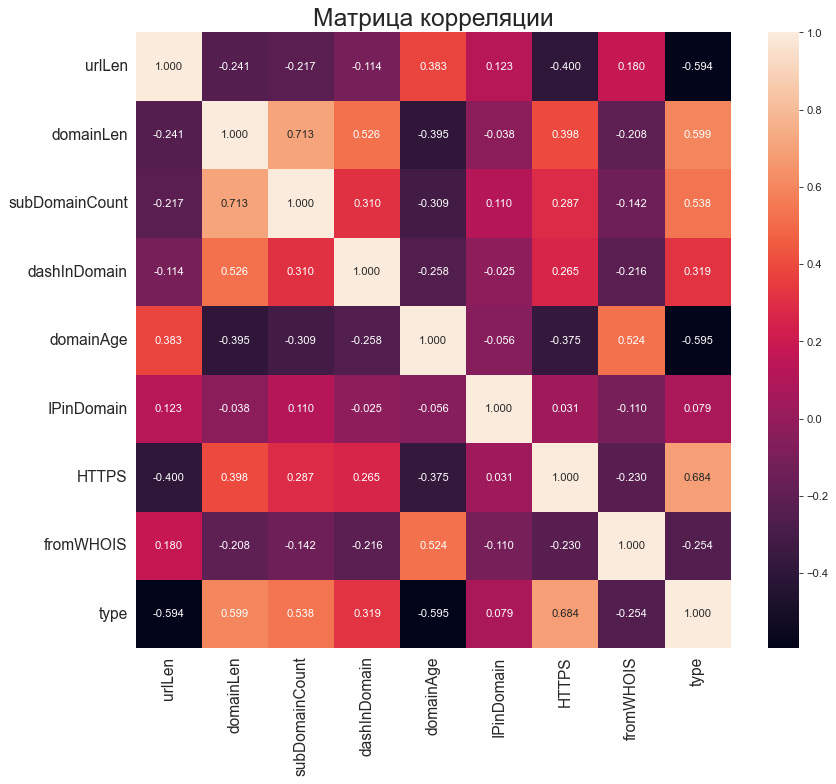

In [49]:
correlationMap(allDataset.loc[:,
               ['urlLen', 'domainLen', 'subDomainCount', 'dashInDomain', 'domainAge', 'IPinDomain', 'HTTPS',
                'fromWHOIS', 'type']])

count    20125.000000
mean         0.006112
std          0.077941
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: IPinDomain, dtype: float64
count    20125.000000
mean         0.401441
std          0.490202
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: HTTPS, dtype: float64


C:\Users\Ekate\AppData\Local\Temp\ipykernel_19232\2684297033.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(data=df, x=column, y='type', kind="bar", aspect=1.5, ci=None).set(title='Distribution of classes')
C:\Users\Ekate\AppData\Local\Temp\ipykernel_19232\2684297033.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(data=df, x=column, y='type', kind="bar", aspect=1.5, ci=None).set(title='Distribution of classes')


count    20125.000000
mean         0.091329
std          0.288084
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: dashInDomain, dtype: float64
count    20125.000000
mean         0.777739
std          0.415776
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: fromWHOIS, dtype: float64


C:\Users\Ekate\AppData\Local\Temp\ipykernel_19232\2684297033.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(data=df, x=column, y='type', kind="bar", aspect=1.5, ci=None).set(title='Distribution of classes')
C:\Users\Ekate\AppData\Local\Temp\ipykernel_19232\2684297033.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(data=df, x=column, y='type', kind="bar", aspect=1.5, ci=None).set(title='Distribution of classes')


count     20125
unique        7
top          NA
freq      12147
Name: sideOfTheWorld, dtype: object


C:\Users\Ekate\AppData\Local\Temp\ipykernel_19232\2684297033.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(data=df, x=column, y='type', kind="bar", aspect=1.5, ci=None).set(title='Distribution of classes')


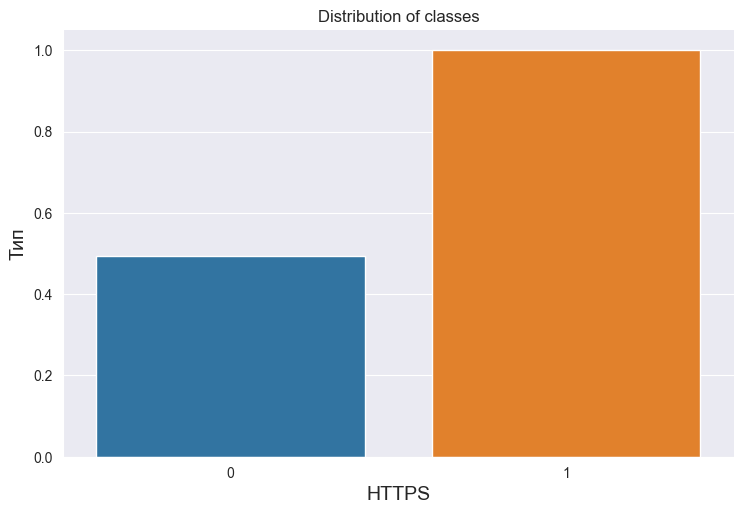

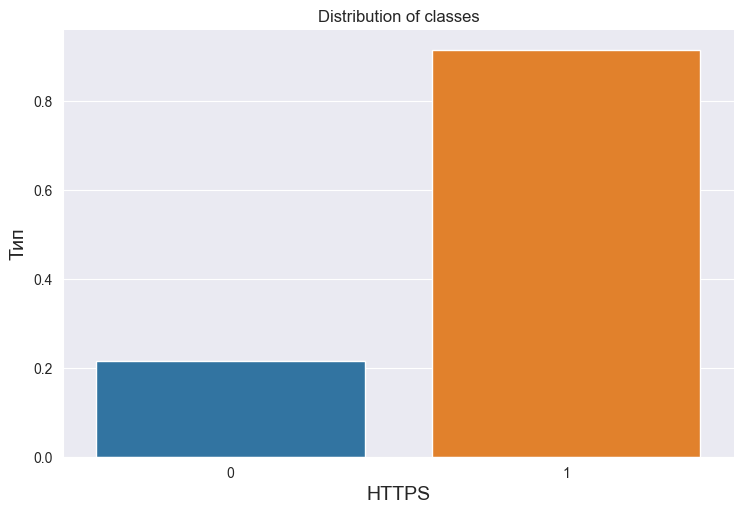

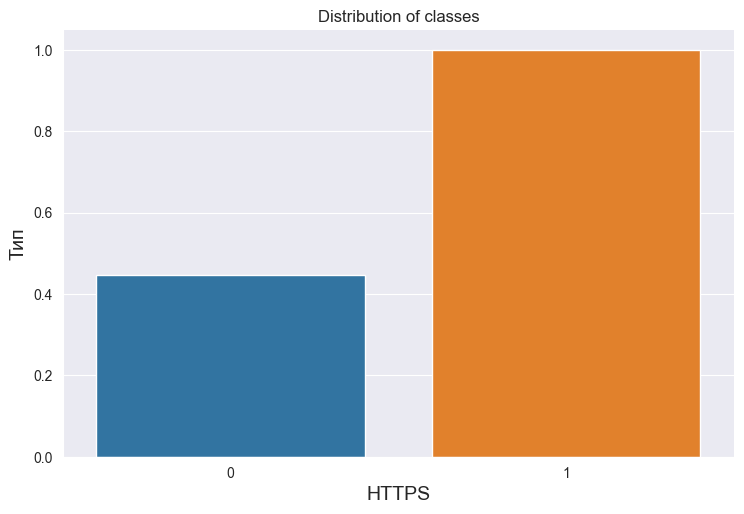

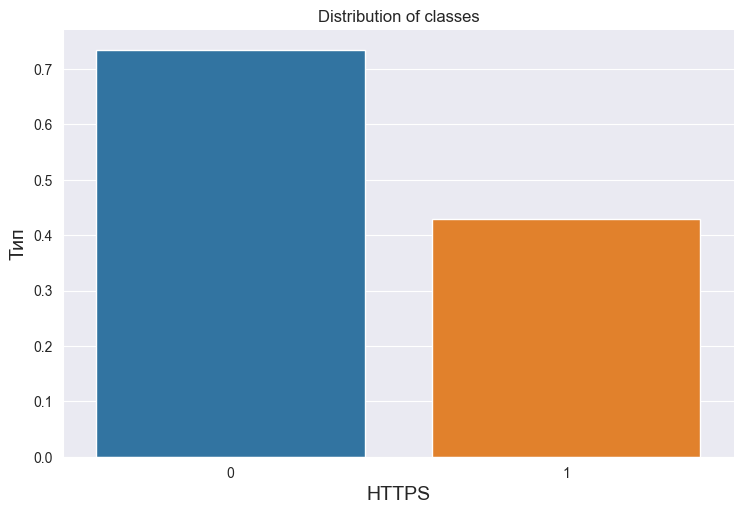

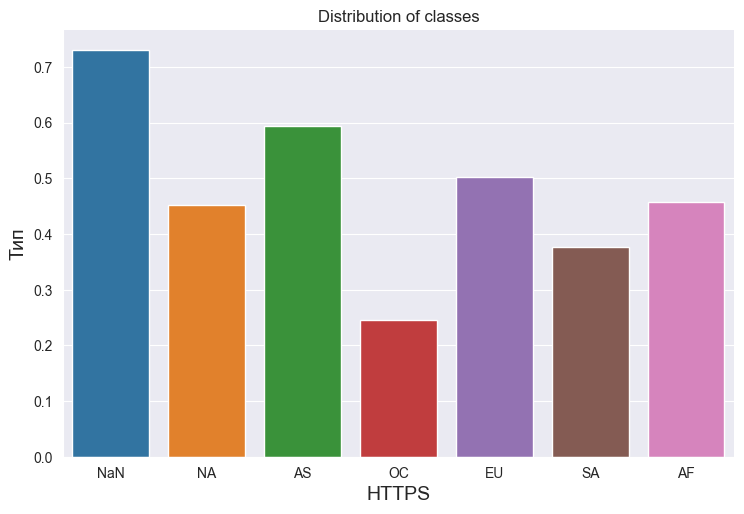

In [47]:
dataAnalysis_DistributionClasses(allDataset.copy())

count    20125.000000
mean        82.984944
std         50.829707
min         13.000000
25%         42.000000
50%         86.000000
75%        105.000000
max        399.000000
Name: urlLen, dtype: float64


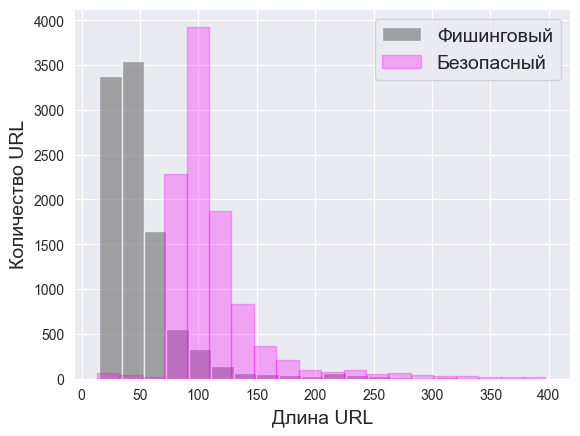

count    20125.000000
mean        18.886360
std         11.894206
min          4.000000
25%         11.000000
50%         15.000000
75%         23.000000
max         94.000000
Name: domainLen, dtype: float64


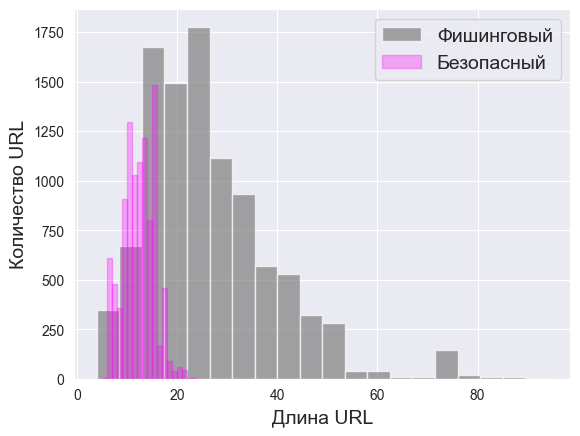

count    20125.000000
mean         0.628273
std          0.973922
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: subDomainCount, dtype: float64


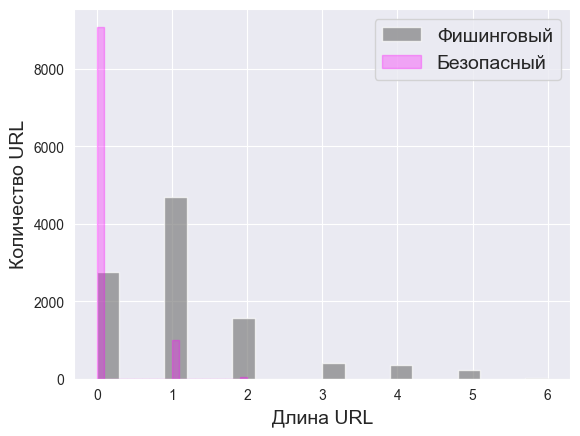

count    20125.000000
mean      3585.191752
std       3655.219705
min          0.000000
25%          0.000000
50%       2816.000000
75%       6735.000000
max      13813.000000
Name: domainAge, dtype: float64


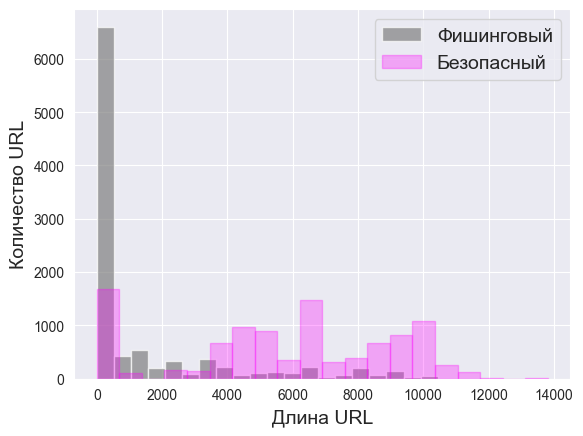

In [22]:
dataAnalysis_CountableParams(allDataset.copy())

# Нормирование данных
Нормирование данных - это процесс приведения значений признаков к определенному диапазону или шкале, обычно от 0 до 1 или от -1 до 1. Это делается для того, чтобы все признаки имели сравнимые масштабы и не были искажены из-за различий в их единицах измерения или распределениях.
Есть несколько подходов, которые можно использовать:
1) Min-max масштабирование - это метод нормирования, который приводит все значения параметров к диапазону от 0 до 1. Для этого каждое значение вычитается из минимального значения вектора параметров, а результат делится на разность между максимальным и минимальным значениями.
2) Стандартизация - это метод нормирования, который приводит значения параметров к нормальному распределению со средним значением 0 и стандартным отклонением 1. Для этого каждое значение вычитается из среднего значения вектора параметров, а результат делится на стандартное отклонение.

Нормирование нужно не для всех моделей машинного обучения. Оно обычно необходимо для моделей, которые используют расстояния между признаками в своих вычислениях, таких как k-Nearest Neighbors (k-NN), Support Vector Machines (SVM) и Linear Regression. Нормирование данных также может помочь ускорить обучение некоторых моделей, таких как Многослойный Перцептрон.
По умолчанию, данные для XGBoost и CatBoost не нормируются. XGBoost и CatBoost обладают сильной способностью к работе с необработанными данными, включая категориальные признаки, что делает нормирование данных менее критичным, чем для некоторых других моделей машинного обучения.


Нормировка данных для Логистической регрессии и Многослойного Перцептрона с использованием Min-max масштабирования:

In [15]:
print('Количество уникальных значений в колонке ISP: ', allDataset['ISP'].nunique(), '\nВ процентном соотношении: ',
      allDataset['ISP'].nunique() / allDataset.shape[0] * 100)
print('Количество уникальных значений в колонке ORG: ', allDataset['ORG'].nunique(), '\nВ процентном соотношении: ',
      allDataset['ORG'].nunique() / allDataset.shape[0] * 100, ' ', allDataset.shape[0])
print('Количество уникальных значений в колонке url: ', allDataset['url'].nunique(), '\nВ процентном соотношении: ',
      allDataset['url'].nunique() / allDataset.shape[0] * 100, ' ', allDataset.shape[0])

Количество уникальных значений в колонке ISP:  654 
В процентном соотношении:  3.2496894409937886
Количество уникальных значений в колонке ORG:  998 
В процентном соотношении:  4.959006211180124   20125
Количество уникальных значений в колонке url:  20124 
В процентном соотношении:  99.99503105590063   20125


In [3]:
allDataset.drop('url', axis=1)

,urlLen,domainLen,subDomainCount,dashInDomain,IPinDomain,domainAge,country,fromWHOIS,HTTPS,ISP,ORG,sideOfTheWorld,type
0,31,23,0,0,0,0,,0,1,,,NaN,1
1,61,28,1,1,0,90,CA,1,1,Google LLC,Contact Privacy Inc. Customer 7151571251,NA,1
2,45,36,5,0,0,609,JP,1,1,Gname.com Pte. Ltd.,Redacted for privacy,AS,1
3,102,7,0,0,0,3262,US,1,1,Protocol Labs,Protocol Labs,NA,1
4,60,52,5,0,0,404,CN,1,0,Alibaba Cloud Computing Ltd. d/b/a HiChina (ww...,hang zhou shi shang su du ke ji you xian gong si,AS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20120,13,5,0,0,0,8944,RU,1,1,LLC VK,Odnoklassniki Services,EU,0
20121,23,15,1,0,0,7153,US,1,1,"GoDaddy.com, LLC","Domains By Proxy, LLC",NA,0
20122,24,15,0,0,0,4717,CN,1,1,Huawei Cloud Service data center,Huawei Cloud Service,AS,0
20123,68,24,1,0,0,0,US,1,1,Amazon Technologies Inc.,AWS CloudFront (GLOBAL),NA,0


In [5]:
print(allDataset.isnull().sum())

url               0
urlLen            0
domainLen         0
subDomainCount    0
dashInDomain      0
IPinDomain        0
domainAge         0
country           0
fromWHOIS         0
HTTPS             0
ISP               0
ORG               0
sideOfTheWorld    0
type              0
dtype: int64


In [288]:
def make_MinMaxScaler(df):
    scaler = MinMaxScaler()
    return pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [269]:
def make_OneHotEncoding(df):
    encoder1 = OneHotEncoder()
    encoder2 = OneHotEncoder()
    sideOfTheWorld = encoder1.fit_transform(df['sideOfTheWorld'].values.reshape(-1, 1)).toarray()
    country = encoder2.fit_transform(df['country'].values.reshape(-1, 1)).toarray()
    encoded_df = pd.concat([pd.DataFrame(sideOfTheWorld), pd.DataFrame(country)], axis=1)
    return encoded_df


In [5]:
categorialDataset = allDataset.loc[:, ['ISP', 'ORG', 'sideOfTheWorld', 'country']]
numericDataset = allDataset.loc[:,
                 ['urlLen', 'domainLen', 'subDomainCount', 'dashInDomain', 'domainAge', 'IPinDomain', 'HTTPS',
                  'fromWHOIS']]
targetDataset = allDataset.loc[:, ['type']]
newAllDataset = pd.concat([numericDataset, categorialDataset, targetDataset], axis=1, join='outer')
#newAllDataset = make_MinMaxScaler(newAllDataset)
print(newAllDataset.head())

   urlLen  domainLen  subDomainCount  dashInDomain  domainAge  IPinDomain   
0      31         23               0             0          0           0  \
1      61         28               1             1         90           0   
2      45         36               5             0        609           0   
3     102          7               0             0       3262           0   
4      60         52               5             0        404           0   

   HTTPS  fromWHOIS                                                ISP   
0      1          0                                                     \
1      1          1                                         Google LLC   
2      1          1                                Gname.com Pte. Ltd.   
3      1          1                                      Protocol Labs   
4      0          1  Alibaba Cloud Computing Ltd. d/b/a HiChina (ww...   

                                                ORG sideOfTheWorld country   
0             

In [6]:
#uselessColumns = ['urlLen', 'domainLen', 'subDomainCount', 'dashInDomain', 'domainAge', 'IPinDomain', 'HTTPS', 'fromWHOIS', 'type', 'sideOfTheWorld', 'country']

#uselessColumns = [['urlLen', 'HTTPS', 'subDomainCount', 'dashInDomain', 'ISP', 'country','ORG', 'sideOfTheWorld']]
uselessColumns = [['urlLen', 'HTTPS', 'subDomainCount', 'ISP', 'ORG']]
numericColumns = ['urlLen', 'domainLen', 'subDomainCount', 'domainAge', 'dashInDomain', 'IPinDomain', 'HTTPS',
                  'fromWHOIS']
numericIndex = [i for i in range(len(numericColumns))]
categorialColumns = ['ISP', 'ORG', 'sideOfTheWorld', 'country']
categorialIndex = [i for i in range(len(numericColumns), len(numericColumns + categorialColumns))]
categorialIndexCopy = categorialIndex.copy()
numericIndexCopy = numericIndex.copy()
numericColumnsCopy = numericColumns.copy()
categorialColumnsCopy = categorialColumns.copy()

In [7]:
scaler = MinMaxScaler()
ohe = OneHotEncoder(handle_unknown='ignore')
numericalSelector = FunctionTransformer(lambda x: x[:, :len(numericColumnsCopy)], validate=False)
numericalPreprocessor = Pipeline([('numericalSelector', numericalSelector), ('scaler', scaler)])
categorialSelector = FunctionTransformer(
    lambda x: x[:, len(numericColumnsCopy):len(numericColumnsCopy + categorialColumnsCopy)],
    validate=False)
categorialPreprocessor = Pipeline([('categorialSelector', categorialSelector), ('ohe', ohe)])
featureUnion = FeatureUnion(
    [('numericalPreprocessor', numericalPreprocessor), ('categorialPreprocessor', categorialPreprocessor)])

In [8]:
metric = 'recall'
cv = 5

In [9]:
lr_scaler_pipeline = Pipeline([('feature_union', featureUnion), (
    'log_reg', GridSearchCV(LogisticRegression(max_iter=1000, penalty='l2'), param_grid={
        'C': np.logspace(-3, 3, 7),'solver': ['lbfgs','liblinear']}, cv=cv, scoring=metric, refit=True, n_jobs=10))])
lr_pipeline = Pipeline([('ohe', ohe), ('log_reg', GridSearchCV(LogisticRegression(max_iter=1000), param_grid={
    'C': np.logspace(-3, 3, 7),
    'solver': ['lbfgs','liblinear']}, cv=cv, scoring=metric, refit=True, n_jobs=10))])
xgboost_pipeline = Pipeline([('feature_union', featureUnion),
                             ('xgboost', GridSearchCV(xgboost.XGBClassifier(objective='binary:logistic'),
                                                      param_grid={'n_estimators': [100, 200, 300],
                                                                  'booster': ['gbtree'],
                                                                  'max_depth': [4, 6, 10],
                                                                  'learning_rate': np.logspace(-3, 0, 4)
                                                                  },
                                                      cv=cv, scoring=metric, refit=True, n_jobs=10))])
mlp_pipeline = Pipeline([('feature_union', featureUnion),
                         ('mlp', GridSearchCV(MLPClassifier( solver='lbfgs', alpha=1e-5, random_state=42,
                                               activation='logistic', max_iter=1000),param_grid={'hidden_layer_sizes':[(10,20),(20,20),(50, 50)]},cv=cv, scoring=metric, refit=True, n_jobs=10))
                         ])

# Создание моделей

Кросс-валидация в машинном обучении - это метод оценки производительности модели, который позволяет проверить, насколько хорошо модель будет работать на новых данных. Для этого исходный набор данных разбивается на несколько частей, называемых «фолдами», и модель обучается на каждом из этих фолдов, используя остальные фолды для валидации.

Pipeline в машинном обучении - это удобный способ объединения нескольких шагов обработки данных и моделирования в единую цепочку. Pipeline позволяет автоматизировать многие процессы, связанные с обработкой и подготовкой данных для обучения модели, и в то же время упрощает код и делает его более понятным и легким для поддержки.

Знакомство с этим фундаментальным разделом стоит начать с изучения способов оценки одной из наиболее популярной постановки задачи - бинарной классификации. В данном случае, данные поделены всего на два класса. Их метки принято обозначать как «+»  и «-». Рассматриваемые нами метрики основаны на использовании следующих исходов: истинно положительные (TP), истинно отрицательные (TN), ложно положительные (FP) и ложно отрицательные (FN). Для наглядности, можно преобразовать в таблицу сопряженности. Ложно положительный и ложно отрицательный исход ещё называют ошибками первого и второго рода соответственно.


### Accuracy
Одной из наиболее простых, а поэтому и распространенной метрикой является точность. Она показывает количество правильно проставленных меток класса (истинно положительных и истинно отрицательных) от общего количества данных и считается следующим образом: (TP+TN)/(TP+TN+FP+FN)
Однако, эта простота является также и причиной, почему её часто критикуют и почему она может абсолютно не подойти под решаемую задачу. Она не учитывает соотношения ложных срабатываний модели, что может быть критическим, особенно в медицинской сфере, когда стоит задача распознать все истинные случаи диагноза.

### Precision
Несмотря на различные английские названия и разные формулы подсчета, русский перевод этой метрики также закрепился как «точность», что может вызвать недоумение и конфуз, поэтому следует уточнять, о чем именно вы говорите. Эта точность показывает количество истинно положительных исходов из всего набора положительных меток и считается по следующей формуле: TP/(TP+FP)
Важность этой метрики определяется тем, насколько высока для рассматриваемой задачи «цена» ложно положительного результата. Если, например, стоимость дальнейшей проверки наличия заболевания у пациента высока и мы просто не можем проверить все ложно положительные результаты, то стоит максимизировать данную метрику.

### Recall (true positive rate)
В русском языке для этого термина используется слово «полнота» или «чувствительность». Эта метрика определяет количество истинно положительных среди всех меток класса, которые были определены как «положительный» и вычисляется по следующей формуле: TP/(TP+FN)
Необходимо уделить особое внимание этой оценке, когда в поставленной задаче ошибка нераспознания положительного класса высока.

### F1-Score
В том случае, если Precision и Recall являются одинаково значимыми, можно использовать их среднее гармоническое для получения оценки результатов.

### ROC
ROC (receiver operating characteristic) – график, показывающий зависимость верно классифицируемых объектов положительного класса от ложно положительно классифицируемых объектов негативного класса. Иными словами, соотношение True Positive Rate (Recall) и False Positive Rate.

### AUC (Area Under Curve)
В качестве численной оценки ROC кривой принято брать площадь под этой кривой, которая является неплохим «итогом» для кривой. Если между кривыми X и Y существует доминирование первой над второй, то AUC (X) > AUC (Y), обратное не всегда верно. Но AUC обладает так же и статистическим смыслом: она показывает вероятность того, что случайно выбранный экземпляр негативного класса будет иметь меньше вероятность быть распознанным как позитивный класс, чем случайно выбранный позитивный класс

### Среднеквадратическая ошибка (MSE)
Измеряет отклонение прогнозируемых значений от фактических и возводит разность в квадрат. Последнее необходимо, чтобы получить дистанцию между реальным и спрогнозированным: простая разность может быть отрицательным числом, и это исказит расчеты. Она часто используется для задач Регрессии (Regression).


In [14]:
def LogReg(partOfData):
    global coefLogReg
    global interceptLogReg
    X_train, X_test, y_train, y_test = train_test_split(partOfData, partOfData['type'], test_size=0.2, random_state=42)
    x_train = X_train.drop(columns=['type']).values
    y_train = X_train['type'].values
    x_test = X_test.drop(columns=['type']).values
    y_test = X_test['type'].values

    if len(numericColumns) == 0:
        model = lr_pipeline.fit(x_train, y_train)
    else:
        model = lr_scaler_pipeline.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    if metric == 'recall':
        print('Recall: ', recall_score(y_test, y_pred))
    elif metric == 'accuracy':
        print('Accuracy: ', accuracy_score(y_test, y_pred))
    elif metric == 'precision':
        print('Precision: ', precision_score(y_test, y_pred))
    elif metric == 'f1':
        print('F1: ', f1_score(y_test, y_pred))
    elif metric == 'auc':
        print('AUC: ', roc_auc_score(y_test, y_pred))



    return model

In [223]:
def GradXGBOOST(partOfData):
    X_train, X_test, y_train, y_test = train_test_split(partOfData, partOfData['type'], test_size=0.2, random_state=42)
    x_train = X_train.drop(columns=['type']).values
    y_train = X_train['type'].values
    x_test = X_test.drop(columns=['type']).values
    y_test = X_test['type'].values

    model = xgboost_pipeline.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    if metric == 'recall':
        print('Recall: ', recall_score(y_test, y_pred))
    elif metric == 'accuracy':
        print('Accuracy: ', accuracy_score(y_test, y_pred))
    elif metric == 'precision':
        print('Precision: ', precision_score(y_test, y_pred))
    elif metric == 'f1':
        print('F1: ', f1_score(y_test, y_pred))


    #print(model.named_steps['xgboost'].best_params_)
    #print(model.named_steps['xgboost'].best_estimator_.coef_)

    print()
    return model

In [265]:
def GradCATBOOST(partOfData):
    X_train, X_test, y_train, y_test = train_test_split(partOfData, partOfData['type'], test_size=0.2, random_state=42)
    x_train = X_train.drop(columns=['type']).values
    y_train = X_train['type'].values
    x_test = X_test.drop(columns=['type']).values
    y_test = X_test['type'].values

    model = GridSearchCV(catboost.CatBoostClassifier(
                                        cat_features=categorialIndexCopy,
                                        l2_leaf_reg=0.1,
                                        logging_level='Silent'),param_grid={'n_estimators': [100, 200, 300],
                                                     'depth': [4, 6, 10],
                                                     'learning_rate': np.logspace(-3, 0, 4)
                                                                  },
                                                      cv=cv, scoring=metric, refit=True, n_jobs=10)

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    if metric == 'recall':
        print('Recall: ', recall_score(y_test, y_pred))
        print('Accuracy: ', accuracy_score(y_test, y_pred))
        print('Precision: ',precision_score(y_test, y_pred))
        print('F1: ',f1_score(y_test, y_pred))
        print('AUC: ',roc_auc_score(y_test, y_pred))
    '''elif metrica == 'accuracy':
        print('Accuracy: ', accuracy_score(y_test, y_pred))
    elif metrica == 'precision':
        print('Precision: ',precision_score(y_test, y_pred))
    elif metrica == 'f1':
        print('F1: ',f1_score(y_test, y_pred))
    elif metrica == 'auc':
        print('AUC: ',roc_auc_score(y_test, y_pred))'''

    #scores = cross_val_score(model, X=x_train, y=y_train, cv=cv, scoring=metrica, n_jobs=-1)



    print()
    return model

In [255]:
def MLP(partOfData):
    X_train, X_test, y_train, y_test = train_test_split(partOfData, partOfData['type'], test_size=0.2, random_state=42)
    x_train = X_train.drop(columns=['type']).values
    y_train = X_train['type'].values
    x_test = X_test.drop(columns=['type']).values
    y_test = X_test['type'].values

    model = mlp_pipeline.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    if metric == 'recall':
        print('Recall: ', recall_score(y_test, y_pred))
        print('Accuracy: ', accuracy_score(y_test, y_pred))
        print('Precision: ', precision_score(y_test, y_pred))
        print('F1: ', f1_score(y_test, y_pred))
        print('AUC: ', roc_auc_score(y_test, y_pred))
    '''elif metric == 'accuracy':
        print('Accuracy: ', accuracy_score(y_test, y_pred))
    elif metric == 'precision':
        print('Precision: ', precision_score(y_test, y_pred))
    elif metric == 'f1':
        print('F1: ', f1_score(y_test, y_pred))
    elif metric == 'auc':
        print('AUC: ', roc_auc_score(y_test, y_pred))'''

    print(model.score(x_test, y_test))
    print()
    return model

In [273]:
def stackingModel(partOfData):
    X_train, X_test, y_train, y_test = train_test_split(partOfData, partOfData['type'], test_size=0.2, random_state=42)
    x_train = X_train.drop(columns=['type']).values
    y_train = X_train['type'].values
    x_test = X_test.drop(columns=['type']).values
    y_test = X_test['type'].values
    baseModels = [modelLogReg, modelXGBoost]
    metaModel = LogisticRegression(random_state=42)
    stackingModel = StackingClassifier(classifiers=baseModels, meta_classifier = metaModel)
    stackingModel.fit(x_train,y_train)
    y_pred = stackingModel.predict(x_test)
    print('Recall: ', recall_score(y_test, y_pred))

    return stackingModel

In [11]:
def modelTesting(model, df):
    global numericColumnsCopy
    global categorialColumnsCopy
    global categorialIndexCopy
    for useless_cols in uselessColumns:
        numericColumnsCopy = numericColumns.copy()
        categorialColumnsCopy = categorialColumns.copy()
        categorialIndexCopy = categorialIndex.copy()
        if not (useless_cols[0] is None):
            print("Deleted columns:", useless_cols)
            for useless_col in useless_cols:
                try:
                    numericColumnsCopy.remove(useless_col)
                    categorialIndexCopy = [x - 1 for x in categorialIndexCopy]
                except ValueError:
                    categorialColumnsCopy.remove(useless_col)
                    categorialIndexCopy.pop()

            m = model(df.drop(columns=useless_cols))
        else:
            m = model(df)

    return m

In [278]:
metric = 'recall'
modelStacking_LogReg_XGBoost = stackingModel(newAllDataset)

Recall:  0.9925


In [15]:
metric = 'recall'
modelLogReg = modelTesting(LogReg, newAllDataset)
'''metric = 'accuracy'
modelLogReg =modelTesting(LogReg, newAllDataset)
metric = 'precision'
modelLogReg =modelTesting(LogReg, newAllDataset)
metric = 'f1'
modelLogReg =modelTesting(LogReg, newAllDataset)
metric = 'auc'
modelLogReg =modelTesting(LogReg, newAllDataset)'''

Deleted columns: ['urlLen', 'HTTPS', 'subDomainCount', 'ISP', 'ORG']


KeyboardInterrupt: 

In [277]:
metric = 'recall'
modelXGBoost = modelTesting(GradXGBOOST, newAllDataset)
metric = 'accuracy'
modelXGBoost = modelTesting(GradXGBOOST, newAllDataset)
metric = 'precision'
modelXGBoost = modelTesting(GradXGBOOST, newAllDataset)
metric = 'f1'
modelXGBoost = modelTesting(GradXGBOOST, newAllDataset)
#metric = 'auc'
#modelTesting(GradCATBOOST, newAllDataset, metric)'''

Deleted columns: ['urlLen', 'HTTPS', 'subDomainCount', 'ISP', 'ORG']
Recall:  0.971

Deleted columns: ['urlLen', 'HTTPS', 'subDomainCount', 'ISP', 'ORG']
Accuracy:  0.9823602484472049

Deleted columns: ['urlLen', 'HTTPS', 'subDomainCount', 'ISP', 'ORG']
Precision:  0.9933503836317136

Deleted columns: ['urlLen', 'HTTPS', 'subDomainCount', 'ISP', 'ORG']
F1:  0.9820480404551202



In [276]:
metric = 'recall'
modelCATBoost = modelTesting(GradCATBOOST, newAllDataset)
'''metric = 'accuracy'
modelTesting(GradCATBOOST, newAllDataset)
metric = 'precision'
modelTesting(GradCATBOOST, newAllDataset)
metric = 'f1'
modelTesting(GradCATBOOST, newAllDataset)
metric = 'auc'
modelTesting(GradCATBOOST, newAllDataset)'''

Deleted columns: ['urlLen', 'HTTPS', 'subDomainCount', 'ISP', 'ORG']
Recall:  0.9645
Accuracy:  0.9739130434782609
Precision:  0.9826795720835456
F1:  0.9735049205147616
AUC:  0.973854938271605



"metric = 'accuracy'\nmodelTesting(GradCATBOOST, newAllDataset)\nmetric = 'precision'\nmodelTesting(GradCATBOOST, newAllDataset)\nmetric = 'f1'\nmodelTesting(GradCATBOOST, newAllDataset)\nmetric = 'auc'\nmodelTesting(GradCATBOOST, newAllDataset)"

In [261]:
metric = 'recall'
modelMLP = modelTesting(MLP, newAllDataset)
'''metric = 'accuracy'
modelTesting(MLP, newAllDataset)
metric = 'precision'
modelTesting(MLP, newAllDataset)
metric = 'f1'
modelTesting(MLP, newAllDataset)
metric = 'auc'
modelTesting(MLP, newAllDataset)'''

Deleted columns: ['urlLen', 'HTTPS', 'subDomainCount', 'ISP', 'ORG']
Recall:  0.931
Accuracy:  0.9609937888198757
Precision:  0.98989898989899
F1:  0.9595465086317959
AUC:  0.9608086419753087
0.931



D:\Универ\8семестр\КМЗИ\PhishingScanner\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


"metric = 'accuracy'\nmodelTesting(MLP, newAllDataset)\nmetric = 'precision'\nmodelTesting(MLP, newAllDataset)\nmetric = 'f1'\nmodelTesting(MLP, newAllDataset)\nmetric = 'auc'\nmodelTesting(MLP, newAllDataset)"

In [200]:
def Model_predict(x_new, model):
    x_new = x_new.drop(columns=['type']).values
    print(x_new)
    y_pred = model.predict(x_new)
    proba=model.predict_proba(x_new)[0]
    return y_pred[0], proba

In [29]:
test = newAllDataset.sample(1)
found_type = Model_predict(test, modelLogReg)
print('Found: ', found_type)
print('Real: ', test['type'])

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=9]="Hollywoodlife.com, LLC": Cannot convert 'b'Hollywoodlife.com, LLC'' to float

In [26]:
countP = 0
for i in range(newAllDataset.shape[0]):
    row = newAllDataset.iloc[[i]]
    found_type = Model_predict(row, modelLogReg)
    if int(found_type) == int(row['type']):
        countP = countP + 1
print(countP)


C:\Users\Ekate\AppData\Local\Temp\ipykernel_9112\3590323814.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  if int(found_type)==int(row['type']):


CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=9]="Contact Privacy Inc. Customer 7151571251": Cannot convert 'b'Contact Privacy Inc. Customer 7151571251'' to float

In [30]:
test = newAllDataset.iloc[1]
test = test.drop(columns=['urlLen']).values
test = test.drop(columns=['country']).values
test = test.drop(columns=['HTTPS']).values
found_type = Model_predict(test, modelLogReg)
print('Real type:', test.type)
print('Found type:', found_type)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [279]:
import cloudpickle

with open('modelLogReg.pkl', 'wb') as f:
    cloudpickle.dump(modelLogReg, f)

In [280]:
import cloudpickle

with open('modelXGBoost.pkl', 'wb') as f:
    cloudpickle.dump(modelXGBoost, f)

In [281]:
import cloudpickle

with open('modelCATBoost.pkl', 'wb') as f:
    cloudpickle.dump(modelCATBoost, f)

In [262]:
import cloudpickle

with open('modelMLP.pkl', 'wb') as f:
    cloudpickle.dump(modelMLP, f)

In [282]:
import cloudpickle

with open('modelStacking_LogReg_XGBoost.pkl', 'wb') as f:
    cloudpickle.dump(modelStacking_LogReg_XGBoost, f)

In [56]:
htmlParamPh = pd.read_csv('ResultPhish_HTML.csv', na_filter=False)
htmlParamPh['type'] = 1
htmlParamBen1 = pd.read_csv('ResultBenign_part1_HTML.csv', na_filter=False)
htmlParamBen2 = pd.read_csv('ResultBenign_part2_HTML.csv', na_filter=False)
htmlParamBen = pd.concat([htmlParamBen1, htmlParamBen2], axis=0, ignore_index=True)
htmlParamBen['type'] = 0
htmlParamBen3 = htmlParamBen.head(htmlParamPh.shape[0])
allHtml = pd.concat([htmlParamPh, htmlParamBen3], axis=0, ignore_index=True)


count    5264.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: prohibitingTheOpeningEC, dtype: float64


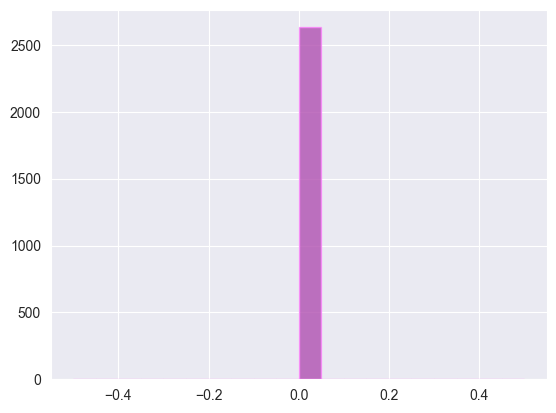

count    5264.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: countPagesToAnotherDomain, dtype: float64


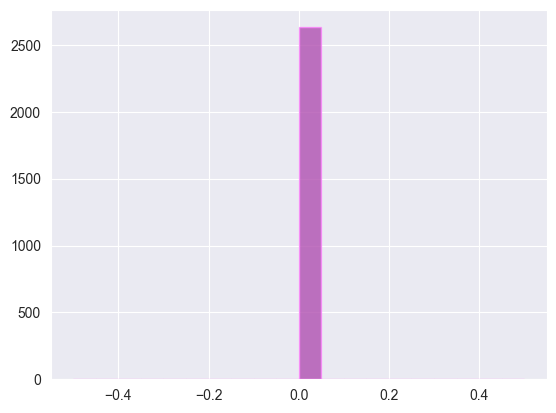

count    5264.000000
mean       24.893617
std        58.752217
min         0.000000
25%         0.000000
50%         0.000000
75%        18.250000
max       755.000000
Name: countChildPages, dtype: float64


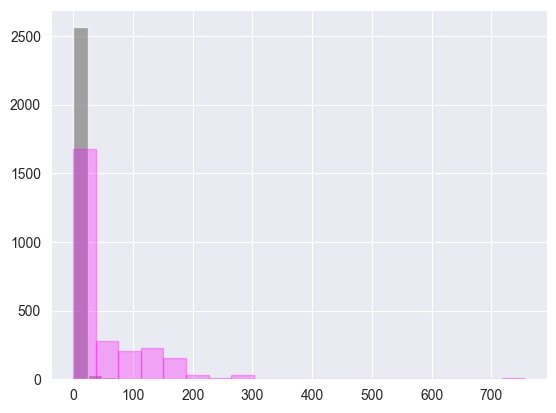

count    5264.000000
mean        0.113222
std         0.393400
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.000000
Name: countPagesJS, dtype: float64


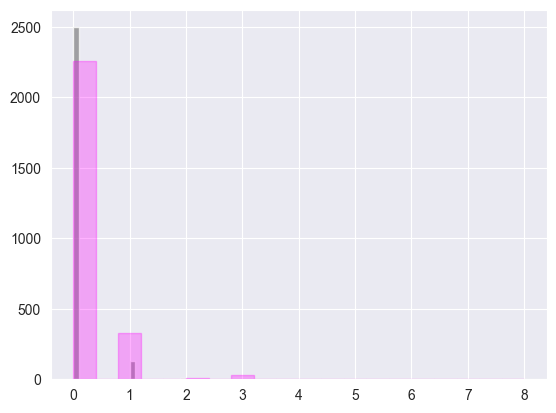

In [57]:
for column in ['prohibitingTheOpeningEC', 'countPagesToAnotherDomain', 'countChildPages', 'countPagesJS']:
    print(allHtml[column].describe())
    plt.hist(x=allHtml[allHtml['type'] == 1][column], label='Phishing', color='grey', bins=20, alpha=0.7)
    plt.hist(x=allHtml[allHtml['type'] == 0][column], label='Benign', color='magenta', bins=20,
             edgecolor='magenta', alpha=0.3)
    plt.show()

In [53]:
print(htmlParamPh.shape[0])
ben = htmlParamBen.head(htmlParamPh.shape[0])
count = 0
for i in range (htmlParamPh.shape[0]):
    if ben['countChildPages'][i]!=0:
        count+=1
print(count)

2632


KeyboardInterrupt: 